## Занятие 4
## Математический анализ
## Анализ функции. Построение графика в matplotlib.pyplot
https://matplotlib.org
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
https://matplotlib.org/tutorials/text/annotations.html

In [ ]:
# Импорт библиотеки matplotlib.pyplot обычно осуществляется так:
import matplotlib.pyplot as plt
from sympy import Symbol, symbols, S, solve, solveset, latex, fraction, Eq
from sympy.calculus.util import continuous_domain
# А для того, чтобы использовать все остальное, сделаем так:
import sympy
import numpy as np
x = Symbol('x')

In [ ]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())




  def set_x(this, min, max, numpoints=1000):
    this.X = np.linspace(float(min + (max - min) / numpoints), float(max - (max - min) / numpoints), numpoints)



  def draw(this, caller, label=True, color=False, linestyle="solid"):
    if (label):
      if (color):
        this.ax.plot(this.X, caller(this.X), label=f"""$f(x) = {sympy.latex(caller(x))}$""", color=color, linestyle=linestyle)
      else:
        this.ax.plot(this.X, caller(this.X), label=f"""$f(x) = {sympy.latex(caller(x))}$""", linestyle=linestyle)
    else:
      if (color):
        this.ax.plot(this.X, caller(this.X), color=color, linestyle=linestyle)
      else:
        this.ax.plot(this.X, caller(this.X), linestyle=linestyle)
  def draw_parametric(this, caller, label=False, color=False, linestyle="solid"):
    if (label):
      if (color):
        this.ax.plot(caller(this.X)[0], caller(this.X)[1], label=label, color=color, linestyle=linestyle)
      else:
        this.ax.plot(caller(this.X)[0], caller(this.X)[1], label=label, linestyle=linestyle)
    else:
      if (color):
        this.ax.plot(caller(this.X)[0], caller(this.X)[1], color=color, linestyle=linestyle)
      else:
        this.ax.plot(caller(this.X)[0], caller(this.X)[1], linestyle=linestyle)




  def pinpoint_zeros(this, caller):
    defined = continuous_domain(caller(x), x, S.Reals)
    roots = solve(caller(x))
    roots.append(0)
    x_coords = []
    y_coords = []
    for i in range(len(roots)):
      checker = True
      for j in range(0, len(x_coords)):
        if (roots[i] == x_coords[j]):
          checker = False
          break
      if (checker and sympy.Intersection(defined, sympy.Interval(roots[i], roots[i])) != sympy.EmptySet):
        x_coords.append(roots[i])
        y_coords.append(sympy.simplify(caller(roots[i])))
    display(x_coords)
    display(y_coords)
    this.ax.scatter(x_coords, y_coords)
    for i, x_coord in enumerate(x_coords):
      this.ax.annotate(f"""A{str(i + 1)}""", xy=(x_coord, y_coords[i]), xycoords='data', xytext=(x_coord + 0.1, y_coords[i] + 4.5), textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))




  def draw_with_asymptots(this, caller, colors=[]):
    color_index = 0
    vertical = [*continuous_domain(f(x), x, S.Reals).symmetric_difference(S.Reals).boundary]

    X = this.X.tolist()
    for i in range(len(vertical)):
      if (vertical[i] < X[0] or vertical[i] > X[len(X) - 1]):
        continue
      if (i == 0):
        this.set_x(X[0], vertical[i])
      else:
        this.set_x(vertical[i - 1], vertical[i])
      this.draw(caller, label=False, color=colors[color_index] if (color_index < len(colors)) else False)
    this.set_x(vertical[len(vertical) - 1], X[len(X) - 1])
    this.draw(caller, color=colors[color_index] if (color_index < len(colors)) else False)
    color_index = color_index + 1
    
    for i in range(len(vertical)):
      if (color_index < len(colors)):
        this.ax.axvline(x=vertical[i], label=f"""Асимптота. x={vertical[i]}""", linestyle='dashed', color=colors[color_index])
        color_index = color_index + 1
      else:
        this.ax.axvline(x=vertical[i], label=f"""Асимптота. x={vertical[i]}""", linestyle='dashed')
    
    l_pos = sympy.limit(caller(x), x, sympy.oo)
    if (l_pos != sympy.oo and l_pos != -sympy.oo):
      if (color_index < len(colors)):
        this.ax.plot(X, [l_pos for i in range(len(X))], label=f"""Асимптота. y={l_pos}""", linestyle='dashed', color=colors[color_index])
        color_index = color_index + 1
      else:
        this.ax.plot(X, [l_pos for i in range(len(X))], label=f"""Асимптота. y={l_pos}""", linestyle='dashed')
    l_neg = sympy.limit(caller(x), x, -sympy.oo)
    if (l_neg != sympy.oo and l_neg != -sympy.oo):
      if (color_index < len(colors)):
        this.ax.plot(X, [l_neg for i in range(len(X))], label=f"""Асимптота. y={l_neg}""", linestyle='dashed', color=colors[color_index])
        color_index = color_index + 1
      else:
        this.ax.plot(X, [l_neg for i in range(len(X))], label=f"""Асимптота. y={l_neg}""", linestyle='dashed')
          
    kpos = sympy.limit(caller(x)/x, x, +sympy.oo)
    kneg = sympy.limit(caller(x)/x, x, -sympy.oo)
    if kpos == kneg:
      k = kpos
    else:
      k = (kneg, kpos)
    b = sympy.limit(f(x) - k*x, x, sympy.oo)
    asimp = k * x + b
    if (color_index < len(colors)):
      this.ax.plot(X, [asimp.subs(x, X[i]) for i in range(len(X))], label=f"""$Асимптота. y={sympy.latex(asimp)}$""", linestyle='dashed', color=colors[color_index])
      color_index = color_index + 1
    else:
      this.ax.plot(X, [asimp.subs(x, X[i]) for i in range(len(X))], label=f"""$Асимптота. y={sympy.latex(asimp)}$""", linestyle='dashed')




  def create_legend(this):
    this.ax.legend(loc='best')




  def set_y(this, min, max):
    this.ax.set(ylim=(min, max))


  def add_title(this, title):
    this.ax.set_title(title)



  def set_y_labels(this, ticks, names=False):
    this.ax.set_yticks(ticks)
    if (names):
      this.ax.set_yticklabels(names)

    

  def set_x_labels(this, ticks, names=False):
    this.ax.set_xticks(ticks)
    if (names):
      this.ax.set_xticklabels(names)

### Задание 1
Найти точки пересечения графика функции $f(x) = (x^2 + 3 x - 2)\log_2(3x+1)$ с осями координат, построить график и отметить точки пересечения.

#### Указание. 
Определить функцию как в Примере 3, поскольку нужно будет использовать функцию  $\log_2(x)$ из каждого пакета sympy и numpy.
В numpy использовать $log2(x)$ для вычисления логарифма по основанию 2.

Сроить график только в пределах области определения функции. Точки пересечения с осью OX должны быть не только решениями соответствующего уравнения, но и принадлежать области определения функции.

[0, -3/2 + sqrt(17)/2]

[0, 0]

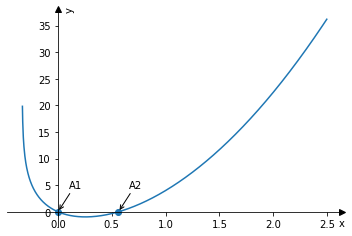

In [ ]:
def sympy_log2(x):
  return(sympy.log(x, 2))
sympy.log2 = sympy_log2;

def f(x, lib=sympy):
 return ((x ** 2 + 3 * x - 2) * lib.log2(3 * x + 1))
def caller(x):
  return(f(x, np))
def caller2(x):
  return(f(x, sympy))
  
picture = graph()
#continuous_domain(caller(x), x, S.Reals)
picture.set_x(-1/3, 2.5)
picture.draw(caller, False, False)
picture.pinpoint_zeros(caller2)

picture.normalize()

### Задание 2
Найти асимптоты графика функции $g(x) = \frac{35x^2 + 4x - 15}{3x - 2}$, построить график и асимптоты, в легенду графика включить формулы функции и асимптот, подписать оси 'x' и 'y'.

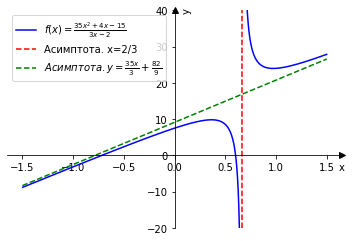

In [ ]:
def f(x):
  return((35 * (x ** 2) + 4 * x - 15) / (3 * x - 2))

picture = graph()
picture.set_x(-1.5, 1.5)
picture.draw_with_asymptots(f, colors=['blue', 'red', 'green'])
picture.create_legend()
picture.set_y(-20, 40)

picture.normalize()

### Задание 3.
Описать в виде функции траекторию пули, выпущенной со скоростью $v_0$ под углом $\alpha$ к горизонту (по умолчанию $v_0 = 0$, $\alpha = \pi/2$)
$$
\left\{
\begin{matrix}
x=v_0t\cos\alpha\\
y=v_0t\sin\alpha-\frac{10t^2}{2}
\end{matrix}
\right.
$$
Аргументы функции $t$, $v_0$ и $\alpha$, результат - два выражения $x$ и $y$, в соответствии с формулами, приведенными выше.

Определить соответствующий набору параметров $v_0$ и $\alpha$ диапазон значений параметра времени $t$, учитывая, что пуля не должна провалиться сквозь землю. 

Построить траектории при заданных значениях начальной скорости и угла на одном графике (($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2$, $\alpha = 1$)). Графики должны быть соответственно зеленого, красного и черного цвета. 

Подписать оси $x$, $y$.

В легенде отразить значения параметров, например, $v_0 = 2,\ \alpha = \pi/6$.

Название графика - Траектории пуль.
#### Указание.
Использовать $\sin$ из numpy.

Решить уравнение $y = 0$ относительно $t$, пользуясь solve или solveset, чтобы с помощью найденного значения $t$ определить правую границу значений $x$.

#### Решение.
Определим функцию, зададим списком данные наборы параметров ($v_0 = 1$, $\alpha = \pi/6$), ($v_0 = 2$, $\alpha= \pi/4$), ($v_0 = 2.5$, $\alpha = 1$) и найдем значение параметра $t$, при котором  $y = 0$. Затем подстановкой subs в t_interval найдем наибольшее значение $t$ и построим графики:

FiniteSet(0, v0*sin(alpha)/5)

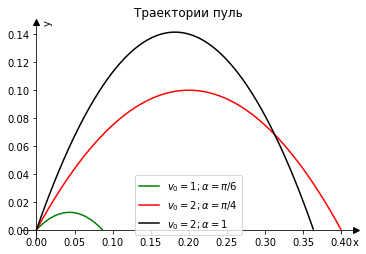

In [ ]:
def get_t_limits(t, v0=0, alpha=sympy.pi/2, lib=np):
  y = v0 * t * lib.sin(alpha) - 10 * t * t / 2
  return(solveset(y, t))
def f(t, v0=0, alpha=sympy.pi/2, lib=np):
  x = v0 * t * lib.cos(float(alpha))
  y = v0 * t * lib.sin(float(alpha)) - 10 * t * t / 2
  return(tuple((x, y)))
vals = [
        (1, sympy.pi/6, "green", "$v_0 = 1; α = \pi / 6$"), 
        (2, sympy.pi/4, "red", "$v_0 = 2; α = \pi / 4$"),
        (2, 1, "black", "$v_0 = 2; α = 1$")
]

t, v0, alpha = symbols('t v0 alpha')
t_limits = get_t_limits(t, v0, alpha, sympy)
display(t_limits)
t_limits = [*t_limits]

v0_default = 0
alpha_default = 0
def caller(x):
  return(f(x, v0_default, alpha_default))
picture = graph()
for item in vals:
  picture.set_x(t_limits[0].subs({v0: item[0], alpha: item[1]}), t_limits[1].subs({v0: item[0], alpha: item[1]}))
  v0_default = item[0]
  alpha_default = item[1]
  picture.draw_parametric(caller, item[3], item[2])
picture.create_legend()
picture.add_title('Траектории пуль')

picture.normalize()

### Индивидуальное задание.
Построить в одной координатной плоскости графики функций.

Вариант 2

Построить в одной координатной плоскости графики функций $f(x) = $
  $3 x - 4$, $g(x) = $
  $4 \sin{\left(3 x \right)}$ на 
  отрезке $\left[ \pi / 3, \  2 \pi / 3\right]$, $f(x)$ красная 
  сплошная линия, $g(x)$ синяя пунктирная линия. 
  Отметки на горизонтальной оси от $\pi / 3$ до $2 \pi / 3$ с 
  шагом $\pi / 6$, отметки подписать формулами как в Примере 3.  
  По вертикальной оси отметки $-4$, 0, $4$.

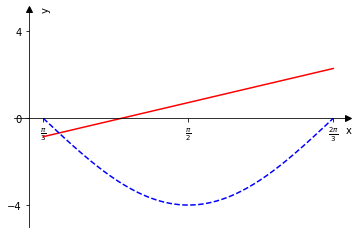

In [ ]:
def f(x):
  return(3 * x - 4)
def g(x):
  return(4 * np.sin(3 * x))

picture = graph()
picture.set_y(-5, 5)
picture.set_x(sympy.pi / 3, 2 * sympy.pi / 3)
picture.draw(f, True, "red")
picture.draw(g, False, "blue", "dashed")

picture.set_y_labels([-4, 0, 4])
picture.set_x_labels([i * float(sympy.pi) / 6 for i in range(2, 5)], [f"""${latex(i * sympy.pi / 6)}$""" for i in range(2, 5)])

picture.normalize()